In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head

<bound method NDFrame.head of         country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
2356279                  ZW              Zimbabwe  Midlands Province   
2356280                  ZW              Zimbabwe  Midlands Province   
2356281                  ZW              Zimbabwe  Midlands Province   
2356282                  ZW              Zimbabwe  Midlands Province   
2356283                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code        date  \
0                NaN    

In [3]:
data=data[data.country_region=="United States"]

In [4]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [5]:
data=data[data.date.astype(str).str.contains("2020-09")]
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794594,US,United States,NaN,NaN,NaN,NaN,NaN,2020-09-01,-9.0,1.0,59.0,-31.0,-36.0,9.0
1794595,US,United States,NaN,NaN,NaN,NaN,NaN,2020-09-02,-9.0,-2.0,59.0,-31.0,-36.0,9.0
1794596,US,United States,NaN,NaN,NaN,NaN,NaN,2020-09-03,-8.0,2.0,70.0,-28.0,-36.0,8.0
1794597,US,United States,NaN,NaN,NaN,NaN,NaN,2020-09-04,-9.0,0.0,80.0,-25.0,-37.0,8.0
1794797,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-09-01,-2.0,6.0,53.0,-2.0,-27.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332289,US,United States,Wyoming,Washakie County,NaN,NaN,56043.0,2020-09-04,NaN,NaN,NaN,NaN,-26.0,NaN
2332433,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-09-01,NaN,NaN,NaN,NaN,-20.0,NaN
2332434,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-09-02,NaN,NaN,NaN,NaN,-20.0,NaN
2332435,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-09-03,NaN,NaN,NaN,NaN,-12.0,NaN


In [6]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [7]:
data.head

<bound method NDFrame.head of         country_region sub_region_1        date  \
1794594  United States          NaN  2020-09-01   
1794595  United States          NaN  2020-09-02   
1794596  United States          NaN  2020-09-03   
1794597  United States          NaN  2020-09-04   
1794797  United States      Alabama  2020-09-01   
...                ...          ...         ...   
2332289  United States      Wyoming  2020-09-04   
2332433  United States      Wyoming  2020-09-01   
2332434  United States      Wyoming  2020-09-02   
2332435  United States      Wyoming  2020-09-03   
2332436  United States      Wyoming  2020-09-04   

         retail_and_recreation_percent_change_from_baseline  \
1794594                                               -9.0    
1794595                                               -9.0    
1794596                                               -8.0    
1794597                                               -9.0    
1794797                                   

In [8]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-8-a41fd17ba840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, how="any", inplace=True)


In [9]:
data.head


<bound method NDFrame.head of         country_region sub_region_1        date  \
1794797  United States      Alabama  2020-09-01   
1794798  United States      Alabama  2020-09-02   
1794799  United States      Alabama  2020-09-03   
1794800  United States      Alabama  2020-09-04   
1795203  United States      Alabama  2020-09-01   
...                ...          ...         ...   
2330417  United States      Wyoming  2020-09-04   
2330803  United States      Wyoming  2020-09-01   
2330804  United States      Wyoming  2020-09-02   
2330805  United States      Wyoming  2020-09-03   
2330806  United States      Wyoming  2020-09-04   

         retail_and_recreation_percent_change_from_baseline  \
1794797                                               -2.0    
1794798                                               -1.0    
1794799                                                1.0    
1794800                                               -1.0    
1795203                                   

In [10]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-10-a17db85ee869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794797,United States,Alabama,2020-09-01,-0.032084,0.092962,0.225878,0.672164,-0.216923
1794798,United States,Alabama,2020-09-02,0.043608,-0.267582,0.265545,0.549626,-0.216923
1794799,United States,Alabama,2020-09-03,0.194993,0.273234,0.503549,0.672164,-0.466327
1794800,United States,Alabama,2020-09-04,0.043608,-0.087310,0.701886,0.304552,-0.466327
1795203,United States,Alabama,2020-09-01,-0.259161,0.273234,0.186210,1.162313,-0.965136
...,...,...,...,...,...,...,...,...
2330417,United States,Wyoming,2020-09-04,0.119301,1.174595,1.415897,0.427089,-1.214541
2330803,United States,Wyoming,2020-09-01,1.027609,1.445003,0.225878,0.917238,-0.965136
2330804,United States,Wyoming,2020-09-02,0.876224,1.264731,0.265545,0.672164,-0.965136
2330805,United States,Wyoming,2020-09-03,0.876224,1.895684,0.939890,0.794701,-1.463945


In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.69323286 0.12456379 0.09185726 0.0529951 ]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,-0.526804,0.340388,-0.085389,-0.020827
1,-0.374870,0.532309,0.045577,-0.186848
2,-0.942358,0.275888,0.060788,0.048716
3,-0.637563,0.429504,0.462489,0.079332
4,-1.043530,0.821325,-0.384027,0.506552
...,...,...,...,...
3312,-1.898418,-0.082363,0.727310,0.933070
3313,-2.045650,-0.477642,-0.684635,0.292502
3314,-1.803694,-0.409978,-0.500882,0.375655
3315,-2.636721,-0.557708,-0.117828,0.859950


In [12]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,-0.476967,-0.264572,-0.171721,-0.604968
grocery_and_pharmacy_percent_change_from_baseline,-0.412800,-0.729368,-0.175587,0.423682
transit_stations_percent_change_from_baseline,-0.426720,0.046123,0.887689,-0.072987
workplaces_percent_change_from_baseline,-0.458067,0.431307,-0.370873,-0.289069
residential_percent_change_from_baseline,0.458457,-0.458117,0.118927,-0.604664


In [13]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: residential")
print("Greatest contributors to PC2: transit, workplace")

print("Greatest contributor to PC3: transit")
print("Greatest contributors to PC4: grocery")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: residential
Greatest contributors to PC2: transit, workplace
Greatest contributor to PC3: transit
Greatest contributors to PC4: grocery


In [14]:
# # find OPTIMAL value for kmeans
# from sklearn.cluster import KMeans
# data_kmeans = pd.DataFrame(pca_data)
# Sum_of_squared_distances = []
# K = range(1,7)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(pca_data)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()






In [15]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [16]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,-0.526804,0.340388,-0.085389,-0.020827,0
1,-0.374870,0.532309,0.045577,-0.186848,0
2,-0.942358,0.275888,0.060788,0.048716,0
3,-0.637563,0.429504,0.462489,0.079332,0
4,-1.043530,0.821325,-0.384027,0.506552,0
...,...,...,...,...,...
3312,-1.898418,-0.082363,0.727310,0.933070,2
3313,-2.045650,-0.477642,-0.684635,0.292502,2
3314,-1.803694,-0.409978,-0.500882,0.375655,2
3315,-2.636721,-0.557708,-0.117828,0.859950,2


In [17]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [18]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-0.526804,0.340388,-0.085389,-0.020827,0,Alabama
1,-0.374870,0.532309,0.045577,-0.186848,0,Alabama
2,-0.942358,0.275888,0.060788,0.048716,0,Alabama
3,-0.637563,0.429504,0.462489,0.079332,0,Alabama
4,-1.043530,0.821325,-0.384027,0.506552,0,Alabama
...,...,...,...,...,...,...
3312,-1.898418,-0.082363,0.727310,0.933070,2,Wyoming
3313,-2.045650,-0.477642,-0.684635,0.292502,2,Wyoming
3314,-1.803694,-0.409978,-0.500882,0.375655,2,Wyoming
3315,-2.636721,-0.557708,-0.117828,0.859950,2,Wyoming


In [19]:
pca_data.Cluster.unique()

array([0, 2, 3, 1], dtype=int32)

In [20]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 50, 'Alaska': 5, 'Arizona': 11, 'Arkansas': 32, 'California': 22, 'Colorado': 4, 'Connecticut': 9, 'Delaware': 1, 'Florida': 29, 'Georgia': 57, 'Idaho': 6, 'Illinois': 41, 'Indiana': 59, 'Iowa': 14, 'Kansas': 30, 'Kentucky': 36, 'Louisiana': 36, 'Maine': 5, 'Maryland': 12, 'Massachusetts': 6, 'Michigan': 34, 'Minnesota': 13, 'Mississippi': 43, 'Missouri': 24, 'Montana': 4, 'Nebraska': 8, 'Nevada': 3, 'New Hampshire': 10, 'New Jersey': 14, 'New Mexico': 10, 'New York': 30, 'North Carolina': 68, 'North Dakota': 16, 'Ohio': 64, 'Oklahoma': 31, 'Oregon': 14, 'Pennsylvania': 48, 'Rhode Island': 1, 'South Carolina': 51, 'South Dakota': 2, 'Tennessee': 54, 'Texas': 96, 'Utah': 8, 'Vermont': 7, 'Virginia': 22, 'Washington': 21, 'West Virginia': 16, 'Wisconsin': 31, 'Wyoming': 4}, {'Arizona': 20, 'California': 70, 'Colorado': 11, 'Connecticut': 1, 'District of Columbia': 4, 'Florida': 50, 'Georgia': 16, 'Hawaii': 20, 'Illinois': 5, 'Indiana': 2, 'Louisiana': 4, 'Maryland': 28, 'Mas

In [21]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
print(states_clusters)
    

{0: 50, 2: 9, 3: 8}
{0: 5, 2: 2, 3: 5}
{0: 11, 1: 20, 2: 9, 3: 8}
{0: 32, 2: 12, 3: 11}
{0: 22, 1: 70, 2: 4, 3: 70}
{0: 4, 1: 11, 2: 9, 3: 34}
{0: 9, 1: 1, 3: 18}
{0: 1, 2: 5, 3: 8}
{1: 4}
{0: 29, 1: 50, 2: 4, 3: 73}
{0: 57, 1: 16, 2: 8, 3: 35}
{1: 20}
{0: 6, 2: 13, 3: 4}
{0: 41, 1: 5, 2: 20, 3: 39}
{0: 59, 1: 2, 2: 48, 3: 10}
{0: 14, 2: 18, 3: 9}
{0: 30, 2: 7, 3: 3}
{0: 36, 2: 3, 3: 25}
{0: 36, 1: 4, 2: 20, 3: 19}
{0: 5, 2: 12, 3: 3}
{0: 12, 1: 28, 3: 12}
{0: 6, 1: 15, 2: 6, 3: 25}
{0: 34, 1: 11, 2: 13, 3: 21}
{0: 13, 1: 8, 2: 2, 3: 20}
{0: 43, 2: 3, 3: 2}
{0: 24, 1: 2, 2: 29, 3: 23}
{0: 4, 2: 20}
{0: 8, 2: 14, 3: 10}
{0: 3, 1: 4, 2: 7, 3: 8}
{0: 10, 2: 4, 3: 6}
{0: 14, 1: 25, 2: 2, 3: 38}
{0: 10, 1: 8, 3: 26}
{0: 30, 1: 29, 2: 13, 3: 57}
{0: 68, 1: 15, 2: 5, 3: 34}
{0: 16, 2: 4}
{0: 64, 1: 2, 2: 54, 3: 29}
{0: 31, 2: 25, 3: 4}
{0: 14, 1: 12, 2: 24, 3: 15}
{0: 48, 1: 17, 2: 26, 3: 42}
{0: 1, 2: 1, 3: 13}
{0: 51, 2: 8, 3: 19}
{0: 2, 2: 10}
{0: 54, 1: 3, 2: 23, 3: 24}
{0: 96, 1: 54, 2: 

In [22]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: ['Arizona', 'California', 'District of Columbia', 'Hawaii', 'Maryland'], 2: ['Idaho', 'Iowa', 'Maine', 'Missouri', 'Montana', 'Nebraska', 'Oregon', 'South Dakota', 'Wyoming'], 3: ['Colorado', 'Connecticut', 'Delaware', 'Florida', 'Massachusetts', 'Minnesota', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Rhode Island', 'Utah', 'Virginia', 'Washington'], 4: [], 0: ['Alabama', 'Alaska', 'Arkansas', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'New Hampshire', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Vermont', 'West Virginia', 'Wisconsin']}


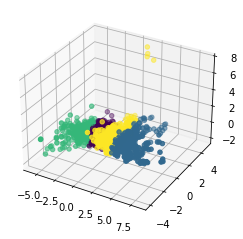

In [23]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [24]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%15==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"],"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of          PC 1      PC 2      PC 3      PC 4 Cluster      State
0   -0.526804  0.340388 -0.085389 -0.020827       0    Alabama
1   -1.856559  0.912170 -0.327882  0.064225       0    Alabama
2   -1.016566  0.792710  0.312212  0.401556       0    Alabama
3   -0.606089  0.302173  0.241754 -0.008567       0    Alabama
4   -0.010144  0.426340  0.208863  0.235251       0    Alabama
..        ...       ...       ...       ...     ...        ...
217 -1.458987 -0.199365 -0.651636  0.099834       0  Wisconsin
218 -2.236116 -0.599429  0.027143  0.173985       2  Wisconsin
219 -1.391934  0.182808  0.132737 -0.149182       0  Wisconsin
220 -0.970268  0.464640  1.827696  0.010782       0  Wisconsin
221 -2.636721 -0.557708 -0.117828  0.859950       2    Wyoming

[222 rows x 6 columns]>

In [25]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-0.526804,0.340388,-0.085389,-0.020827,0,Alabama
1,-1.856559,0.912170,-0.327882,0.064225,0,Alabama
2,-1.016566,0.792710,0.312212,0.401556,0,Alabama
3,-0.606089,0.302173,0.241754,-0.008567,0,Alabama
4,-0.010144,0.426340,0.208863,0.235251,0,Alabama
...,...,...,...,...,...,...
217,-1.458987,-0.199365,-0.651636,0.099834,0,Wisconsin
218,-2.236116,-0.599429,0.027143,0.173985,2,Wisconsin
219,-1.391934,0.182808,0.132737,-0.149182,0,Wisconsin
220,-0.970268,0.464640,1.827696,0.010782,0,Wisconsin


In [26]:
clusters_and_their_states.values()

dict_values([['Arizona', 'California', 'District of Columbia', 'Hawaii', 'Maryland'], ['Idaho', 'Iowa', 'Maine', 'Missouri', 'Montana', 'Nebraska', 'Oregon', 'South Dakota', 'Wyoming'], ['Colorado', 'Connecticut', 'Delaware', 'Florida', 'Massachusetts', 'Minnesota', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Rhode Island', 'Utah', 'Virginia', 'Washington'], [], ['Alabama', 'Alaska', 'Arkansas', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'New Hampshire', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Vermont', 'West Virginia', 'Wisconsin']])

In [27]:
# vals=list(clusters_and_their_states.values())
# keys=list(clusters_and_their_states.keys())
# for index, row in pca_2.iterrows():
#     for i in range(len(vals)):
#         if row["State"] in vals[i]:
#             pca_2.at[index, "Cluster"]= keys[i]
# pca_2
            
            
    

In [29]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+6)*2

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("SEPT Mobility KMeans.html")
                   )


'SEPT Mobility KMeans.html'